In [1]:
import math
import time
import matplotlib.pyplot as plt
import torch
import trimesh

from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)

import torch
import torch.nn.functional as F
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.io import load_obj
from pytorch3d.structures import (
    Pointclouds,
    Meshes,
)
from pytorch3d.renderer.blending import BlendParams
from pytorch3d.renderer import TexturesVertex
from src.render.mesh_renderer import MeshPointsRenderer
from src.config import get_parser
from src.blueprint_sampler import BlueprintSampler
from src.util import grid_to_list

In [2]:
# Set the cuda device
device = torch.device("cuda:0")
torch.cuda.set_device(device)

bs = 1
    
config = get_parser().parse_args(args=[])

config.raster_image_size = 1024
config.raster_radius = 0.012
config.raster_points_per_pixel = 4
    
d_size = 514
config.data_blueprint = f'blueprint_radial_{d_size}.npz'
config.data_blueprint_size = d_size
config.data_patch_size = d_size
config.raster_max_brightness = 0.9
blueprintSampler = BlueprintSampler(config)
res = blueprintSampler(bs)
points = res['points']
normals = res['normals']
faces = res['faces']

points = grid_to_list(points).to(device)
normals = grid_to_list(normals).to(device)
#faces = faces.to(device)

points.shape, normals.shape, faces.shape

(torch.Size([1, 264196, 3]),
 torch.Size([1, 264196, 3]),
 torch.Size([1, 526338, 3]))

In [3]:
config.raster_blur_radius = 0.0
config.raster_faces_per_pixel = 1
R = MeshPointsRenderer(config)
R.setup(device)
R = R.to(device)

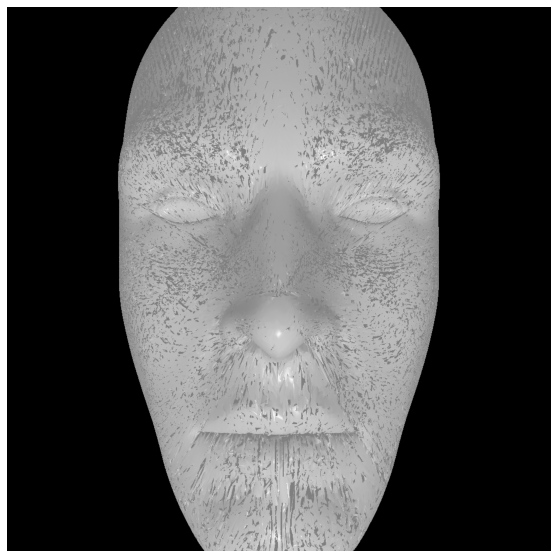

In [4]:
images = R(points)


plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [6]:
print(points.shape,  R.faces.shape)
faces = R.faces.expand(bs, -1, -1)
verts_rgb = torch.ones_like(points)
textures = TexturesVertex(verts_features=verts_rgb.to(points.device))        
mesh = Meshes(verts=points, faces=faces, textures=textures)
mesh

torch.Size([1, 264196, 3]) torch.Size([1, 526338, 3])


In [7]:
R.renderer(mesh)

tensor([[[[1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          ...,
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.]],

         [[1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          ...,
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.]],

         [[1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          ...,
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.]],

         ...,

         [[1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          ...,
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.]],

         [[1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          ...,
          [1., 1., 1., 0.],
          [1., 1., 1., 0.],
          [1., 1., 1., 0.]],

         [[1., 1., 1., 0.],
          [1., 1., 1., 0.],
    

In [8]:
R.renderer.rasterizer

(MeshRasterizer(
   (cameras): FoVPerspectiveCameras()
 ),)

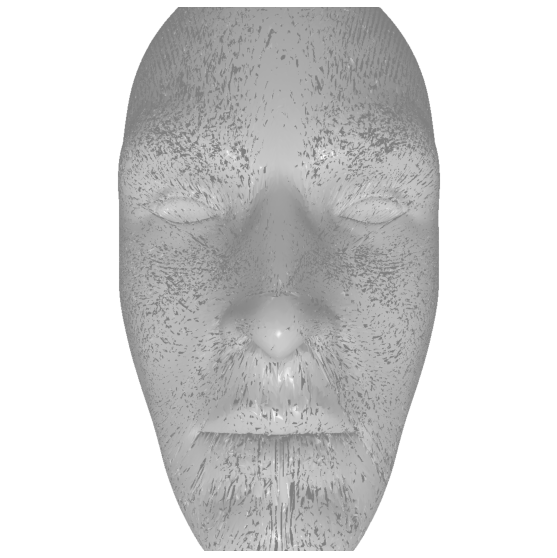

In [4]:
images = R(points)


plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.grid("off")
plt.axis("off");

In [8]:
from pytorch3d.renderer import (     
    SoftPhongShader,
)

from pytorch3d.renderer.blending import BlendParams



In [ ]:
blendParams = BlendParams()

In [ ]:
shader = SoftPhongShader()